Theta_q 1.1851851851851858
Lambda 1.088662107903635


Text(0, 0.5, '$\\hat{J}_{\\tau,\\frac{\\nu}{\\lambda^{2/3}}}(u)$')

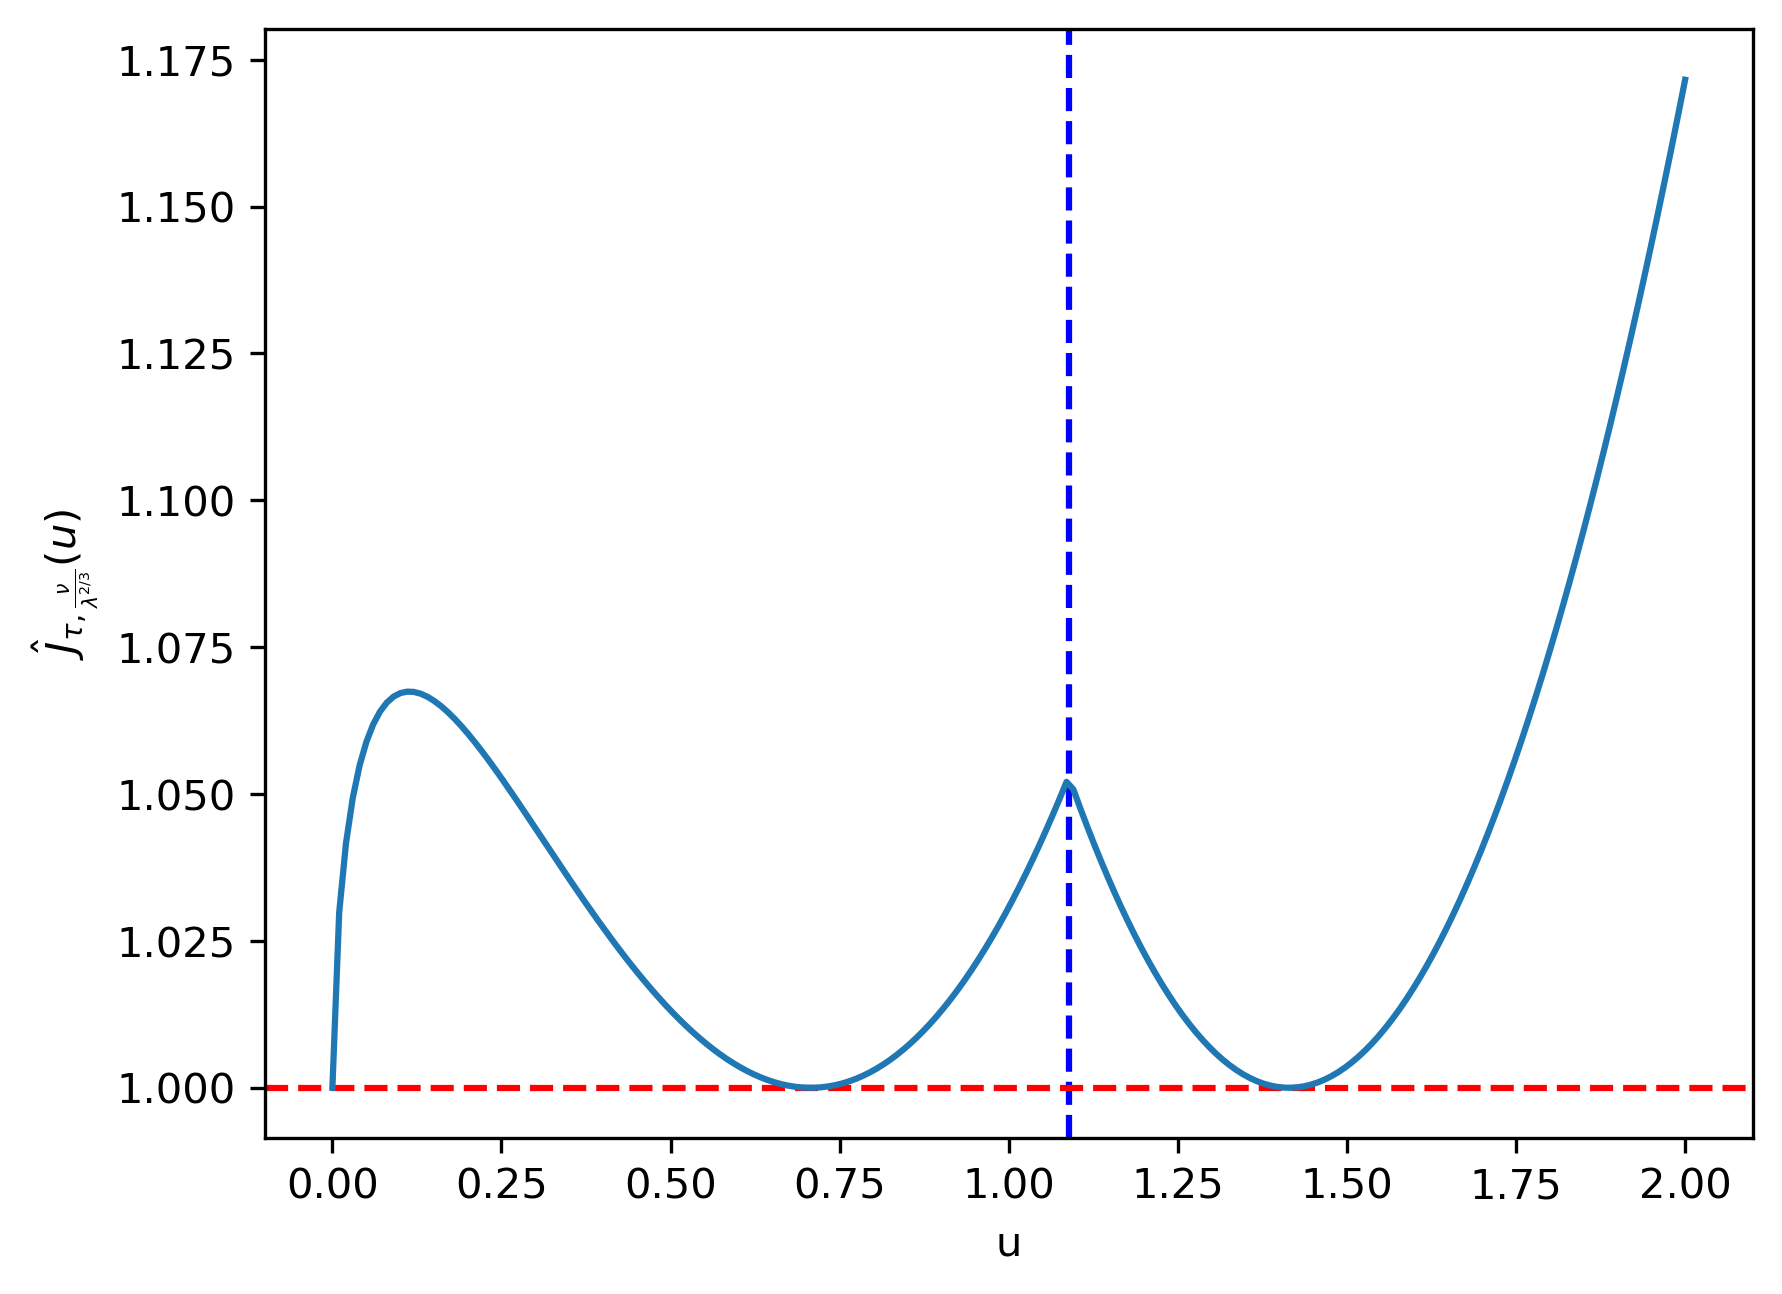

In [7]:
import numpy as np
import matplotlib.pyplot as plt

q=2/3
Theta_q=np.power(np.power(2-q,4-2*q)/(np.power(2,4-3*q)*np.power(1-q,2-2*q)),1/q)
print('Theta_q', Theta_q)
nu=1
Lambda=np.sqrt(Theta_q)
print('Lambda',Lambda)


def J(u): 
    return nu*np.minimum(1.0, np.power(u/Lambda,q)) + 0.5 * (u -np.sqrt(2*nu) )**2

u=np.linspace(0, 2, 200)
Ju=J(u)

plt.rcParams['figure.dpi'] = 300 #分辨率
plt.axvline(x=Lambda, color='blue', linestyle='--')
#plt.axvline(x=Lambda, color='blue', linestyle='--', label=r'$\nu=1,\lambda=\sqrt{\Theta_{\frac{1}{2}}}$')
plt.axhline(y=1, color='red', linestyle='--')
plt.plot(u,Ju)
plt.xlabel('u')
plt.ylabel(r'$\hat{J}_{\tau,\frac{\nu}{\lambda^{2/3}}}(u)$')
#plt.legend()

In [8]:
def Jtauderivative(C,q,tau,t):
    return t+C*q*np.power(t,q-1)-tau

def Bisection(a,b,tau,C,q):
    for i in range(100):
        c=(a+b)/2
        if np.abs(Jtauderivative(C,q,tau,c))<1e-3:
            break 
        if Jtauderivative(C,q,tau,a)*Jtauderivative(C,q,tau,c)<0:
            b=c
        else:
            a=c
    return c

def ProxL1over2(nu,tau):
    if tau>1.5*np.power(nu,2/3):
        theta=np.arccos((-np.power(3,3/2)/4)*nu*np.power(tau,-3/2))
        ytilde=(2/3)*tau*(1+ np.cos((2*theta)/3))
    else:
        ytilde=np.zeros(1)
    return ytilde


def ProxL2over3(nu,tau):
    if np.abs(tau)>2*np.power(2*nu/3,3/4):
        t1=np.sqrt(tau**4/256-8*(nu**3)/729)
        t=2*(np.power(tau**2/16+t1,1/3)+np.power(tau**2/16-t1,1/3))
        ytilde=(1/8)*np.sign(tau)*np.power(np.sqrt(t)+np.sqrt(2*np.abs(tau)/np.sqrt(t) -t),3)
    else:
        ytilde=np.zeros(1)
    return ytilde

def ProxL1over4(nu,tau):
    tautilde=np.power(nu*3/16, 4/7)
    if tau>(7/6)*np.power(3*nu/2,4/7):
        ytilde=Bisection(tautilde,tau,tau,nu,1/4)
    else:
        ytilde=np.zeros(1)
    return ytilde  

def ProxL1over3(nu,tau):
    tautilde=np.power(2*nu/9,3/5)
    if tau>(5/4)*np.power(nu*4/3,3/5):
        ytilde=Bisection(tautilde,tau,tau,nu,1/3)
    else:
        ytilde=np.zeros(1)
    return ytilde 

def ProxL3over4(nu,tau):
    tautilde=np.power(3*nu/16,4/5)
    if tau>(5/2)*np.power(nu/2,4/5):
        ytilde=Bisection(tautilde,tau,tau,nu,3/4)
    else:
        ytilde=np.zeros(1)
    return ytilde

Lambda 1.4142135623730951
nu 1
cnulambda_1over4 1.3998072021955743
C_nulambda_1over4 1.5048680322713541
cnulambda_1over3 1.3860224200640716
C_nulambda_1over3 1.535726840928167
cnulambda_1over2 1.3363480772105092
C_nulambda_1over2 1.5973809855410006
cnulambda_2over3 1.2408064788027993
C_nulambda_2over3 1.657539198265751
cnulambda_3over4 1.1662912394210092
C_nulambda_3over4 1.6865610973613951
Lambda**2/nu>1/2 is satisfied? 2.0000000000000004


C:\Users\LRR\AppData\Local\Temp\ipykernel_28060\2501051090.py:82: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ProxCL1over4[i]=ProxL1over4(nu/np.power(Lambda,1/4),tau[i])
C:\Users\LRR\AppData\Local\Temp\ipykernel_28060\2501051090.py:94: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ProxCL1over3[i]=ProxL1over3(nu/np.power(Lambda,1/3),tau[i])
C:\Users\LRR\AppData\Local\Temp\ipykernel_28060\2501051090.py:105: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ProxCL1over2

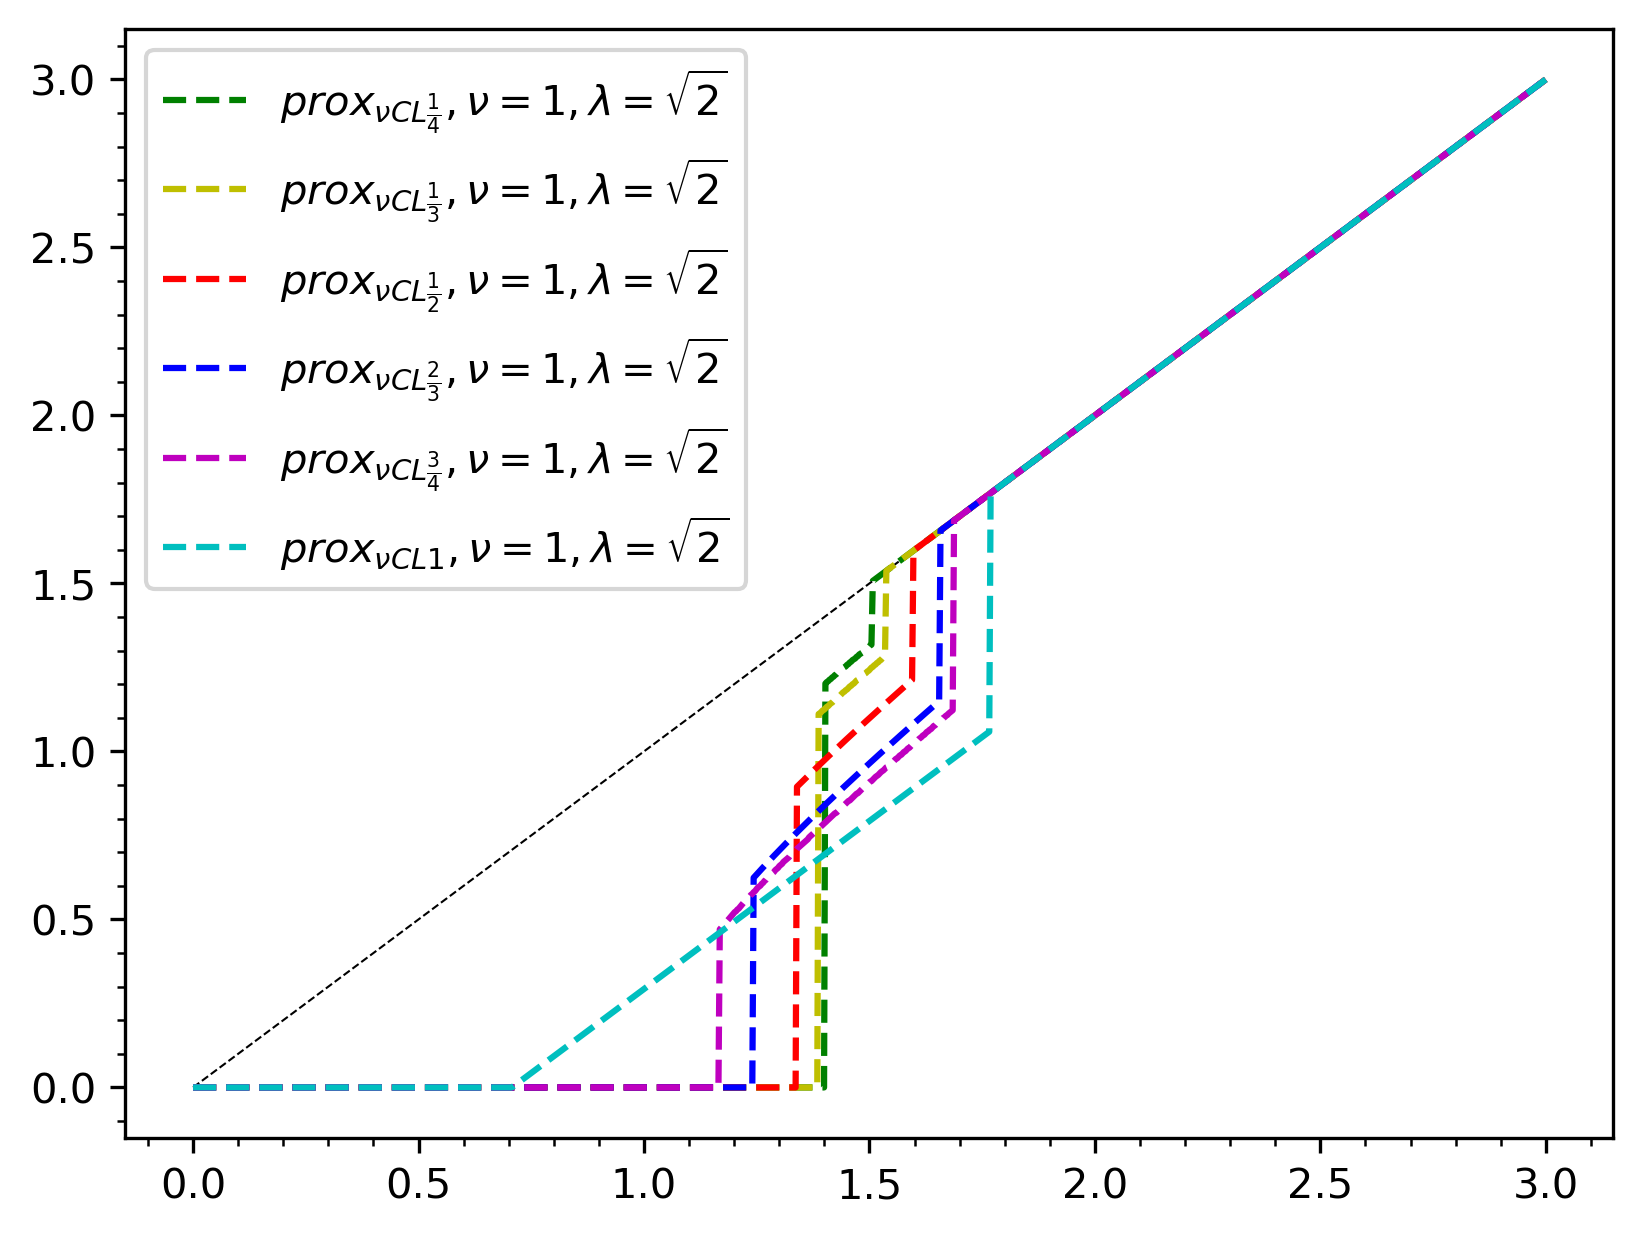

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def J(q,nu,Lambda,u,tau):
    return nu*np.minimum(1.0,np.power(u/Lambda,q)) + 0.5 * (u -tau)**2


#Threshold: C_{\nu,\lambda,q} for CLq
def bisection_CL1over4(a,b,q,nu,Lambda):
    for i in range(20):
        c=(a+b)/2
        if (J(q,nu,Lambda,ProxL1over4(nu/Lambda**q,a),a)-nu)*(J(q,nu,Lambda,ProxL1over4(nu/Lambda**q,c),c)-nu)<0:###
            b=c
        else:
            a=c
        if (b-a)<1e-5:
            break 
    return c

def bisection_CL1over2(a,b,q,nu,Lambda):
    for i in range(20):
        c=(a+b)/2
        if (J(q,nu,Lambda,ProxL1over2(nu/Lambda**q,a),a)-nu)*(J(q,nu,Lambda,ProxL1over2(nu/Lambda**q,c),c)-nu)<0:###
            b=c
        else:
            a=c
        if (b-a)<1e-5:
            break 
    return c

def bisection_CL2over3(a,b,q,nu,Lambda):
    for i in range(20):
        c=(a+b)/2
        if (J(q,nu,Lambda,ProxL2over3(nu/Lambda**q,a),a)-nu)*(J(q,nu,Lambda,ProxL2over3(nu/Lambda**q,c),c)-nu)<0:###
            b=c
        else:
            a=c
        if (b-a)<1e-5:
            break 
    return c

def bisection_CL1over3(a,b,q,nu,Lambda):
    for i in range(20):
        c=(a+b)/2
        if (J(q,nu,Lambda,ProxL1over3(nu/Lambda**q,a),a)-nu)*(J(q,nu,Lambda,ProxL1over3(nu/Lambda**q,c),c)-nu)<0:###
            b=c
        else:
            a=c
        if (b-a)<1e-5:
            break 
    return c

def bisection_CL3over4(a,b,q,nu,Lambda):
    for i in range(20):
        c=(a+b)/2
        if (J(q,nu,Lambda,ProxL3over4(nu/Lambda**q,a),a)-nu)*(J(q,nu,Lambda,ProxL3over4(nu/Lambda**q,c),c)-nu)<0:###
            b=c
        else:
            a=c
        if (b-a)<1e-5:
            break 
    return c


#Lambda=2
Lambda=np.sqrt(2)
print('Lambda', Lambda)
nu=1
print('nu',nu)
tau=np.linspace(0, 3, 1000)

ProxCL1over4=np.zeros(np.shape(tau)[0])
MoreauCL1over4=np.zeros(np.shape(tau)[0])
cnulambda_1over4=(7/6)*np.power((3/2)*nu/np.power(Lambda,1/4),4/7) 
print('cnulambda_1over4',cnulambda_1over4)
C_nulambda_1over4= bisection_CL1over4(cnulambda_1over4,Lambda+(1/4)*nu/Lambda,1/4,nu,Lambda)
print('C_nulambda_1over4',C_nulambda_1over4)
for i in range(np.shape(tau)[0]):
    if tau[i]<C_nulambda_1over4:
        ProxCL1over4[i]=ProxL1over4(nu/np.power(Lambda,1/4),tau[i])
        MoreauCL1over4[i]=J(1/4,nu,Lambda,ProxCL1over4[i],tau[i])
    else:
        ProxCL1over4[i]=tau[i]
        
ProxCL1over3=np.zeros(np.shape(tau)[0])
cnulambda_1over3=(5/4)*np.power((4/3)*nu/np.power(Lambda,1/3),3/5)      
print('cnulambda_1over3',cnulambda_1over3)
C_nulambda_1over3= bisection_CL1over3(cnulambda_1over3,Lambda+(1/3)*nu/Lambda,1/3,nu,Lambda)
print('C_nulambda_1over3',C_nulambda_1over3)
for i in range(np.shape(tau)[0]):
    if tau[i]<C_nulambda_1over3:
        ProxCL1over3[i]=ProxL1over3(nu/np.power(Lambda,1/3),tau[i])
    else:
        ProxCL1over3[i]=tau[i]
        
cnulambda_1over2=(3/2)*np.power(nu/np.power(Lambda,1/2),2/3)
print('cnulambda_1over2',cnulambda_1over2)
C_nulambda_1over2= bisection_CL1over2(cnulambda_1over2,Lambda+(1/2)*nu/Lambda,1/2,nu,Lambda)
print('C_nulambda_1over2',C_nulambda_1over2)
ProxCL1over2=np.zeros(np.shape(tau)[0])
for i in range(np.shape(tau)[0]):
    if tau[i]<C_nulambda_1over2:
        ProxCL1over2[i]=ProxL1over2(nu/np.power(Lambda,1/2),tau[i])
    else:
        ProxCL1over2[i]=tau[i]
        
        
ProxCL2over3=np.zeros(np.shape(tau)[0])
cnulambda_2over3=2*np.power((2/3)*nu/np.power(Lambda,2/3),3/4)   
print('cnulambda_2over3',cnulambda_2over3)
C_nulambda_2over3= bisection_CL2over3(cnulambda_2over3,Lambda+(2/3)*nu/Lambda,2/3,nu,Lambda)
print('C_nulambda_2over3',C_nulambda_2over3)
for i in range(np.shape(tau)[0]):
    if tau[i]<C_nulambda_2over3:
        ProxCL2over3[i]=ProxL2over3(nu/np.power(Lambda,2/3),tau[i])
    else:
        ProxCL2over3[i]=tau[i]
        


ProxCL3over4=np.zeros(np.shape(tau)[0])
cnulambda_3over4=(5/2)*np.power((1/2)*nu/np.power(Lambda,3/4),4/5)      
print('cnulambda_3over4',cnulambda_3over4)
C_nulambda_3over4= bisection_CL3over4(cnulambda_3over4,Lambda+(3/4)*nu/Lambda,3/4,nu,Lambda)
print('C_nulambda_3over4',C_nulambda_3over4)
for i in range(np.shape(tau)[0]):
    if tau[i]<C_nulambda_3over4:
        ProxCL3over4[i]=ProxL3over4(nu/np.power(Lambda,3/4),tau[i])
    else:
        ProxCL3over4[i]=tau[i]        
        
ProxCL1=np.zeros(np.shape(tau)[0])
print('Lambda**2/nu>1/2 is satisfied?',Lambda**2/nu)
for i in range(np.shape(tau)[0]):
    if tau[i]<=nu/Lambda:
        ProxCL1[i]=0
    elif tau[i]<=Lambda+nu/(2*Lambda):
             ProxCL1[i]=tau[i]-np.sign(tau[i])*nu/Lambda
    else:
             ProxCL1[i]=tau[i]

plt.rcParams['figure.dpi'] = 300 
plt.plot(tau,tau,'k--',linewidth=0.5)
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(0.1)) 
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.1)) 


# plt.plot(tau,ProxCL1over4,'g--', label=r'$prox_{\nu CL\frac{1}{4}},\nu=1,\lambda=2$')
# plt.plot(tau,ProxCL1over3,'y--', label=r'$prox_{\nu CL\frac{1}{3}},\nu=1,\lambda=2$')
# plt.plot(tau,ProxCL1over2,'r--', label=r'$prox_{\nu CL\frac{1}{2}},\nu=1,\lambda=2$')
# plt.plot(tau,ProxCL2over3,'b--', label=r'$prox_{\nu CL\frac{2}{3}},\nu=1,\lambda=2$')
# plt.plot(tau,ProxCL3over4,'m--', label=r'$prox_{\nu CL\frac{3}{4}},\nu=1,\lambda=2$')
# plt.plot(tau,ProxCL1,'c--', label=r'$prox_{\nu CL1},\nu=1,\lambda=2$')

plt.plot(tau,ProxCL1over4,'g--', label=r'$prox_{\nu CL\frac{1}{4}},\nu=1,\lambda=\sqrt{2}$')
plt.plot(tau,ProxCL1over3,'y--', label=r'$prox_{\nu CL\frac{1}{3}},\nu=1,\lambda=\sqrt{2}$')
plt.plot(tau,ProxCL1over2,'r--', label=r'$prox_{\nu CL\frac{1}{2}},\nu=1,\lambda=\sqrt{2}$')
plt.plot(tau,ProxCL2over3,'b--', label=r'$prox_{\nu CL\frac{2}{3}},\nu=1,\lambda=\sqrt{2}$')
plt.plot(tau,ProxCL3over4,'m--', label=r'$prox_{\nu CL\frac{3}{4}},\nu=1,\lambda=\sqrt{2}$')
plt.plot(tau,ProxCL1,'c--', label=r'$prox_{\nu CL1},\nu=1,\lambda=\sqrt{2}$')

#plt.grid(which='both')  
plt.legend()
plt.show()